Starting best score, percent target: 65.3
End best score, percent target: 100.0


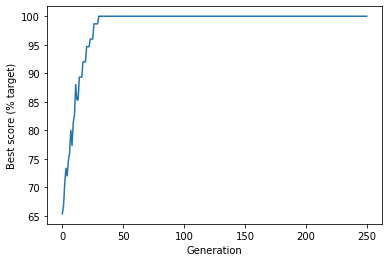

In [41]:
import random
import numpy as np
import myFunctions


    
    

# Set  parameters to be used
chromosome_length = 75
population_size = 500
maximum_generation = 250
best_score_progress = [] # Tracks progress

# Create reference solution 
# (this is used just to illustrate GAs)
reference = create_reference_solution(chromosome_length)

# Create starting population
population = create_starting_population(population_size, chromosome_length)

# Display best score in starting population
scores = calculate_fitness(reference, population)
best_score = np.max(scores)/chromosome_length * 100
print ('Starting best score, percent target: %.1f' %best_score)

# Add starting best score to progress tracker
best_score_progress.append(best_score)

# Now we'll go through the generations of genetic algorithm
for generation in range(maximum_generation):
    # Create an empty list for new population
    new_population = []
    
    # Create new popualtion generating two children at a time
    for i in range(int(population_size/2)):
        parent_1 = individual_selection(population, scores)
        parent_2 = individual_selection(population, scores)
        child_1, child_2 = breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
    
    # Replace the old population with the new one
    population = np.array(new_population)
    
    # Apply mutation
    mutation_rate = 0.002
    population = randomly_mutate_population(population, mutation_rate)

    # Score best solution, and add to tracker
    scores = calculate_fitness(reference, population)
    best_score = np.max(scores)/chromosome_length * 100
    best_score_progress.append(best_score)

# GA has completed required generation
print ('End best score, percent target: %.1f' %best_score)

# Plot progress
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()